# Line Plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('Local_Area_Unemployment_Statistics__Beginning_1976.csv')

In [4]:
data.head(2)

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate
0,New York State,2018,1,9660300,9165100,495200,5.1%
1,New York State,2017,1,9619800,9115700,504100,5.2%


In [5]:
dates = data.apply(lambda x: pd.Timestamp('%d-%d-01' % (x.Year, x.Month)), axis=1)

In [6]:
d = pd.concat((data, pd.DataFrame({'date':dates})), axis=1)

In [7]:
d.head(2)

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,date
0,New York State,2018,1,9660300,9165100,495200,5.1%,2018-01-01
1,New York State,2017,1,9619800,9115700,504100,5.2%,2017-01-01


In [8]:
ny = d[d.Area == 'New York State']
ny = ny.sort_values(by='date')
ny.head(2)

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,date
493,New York State,1976,1,7634700,6780200,854400,11.2%,1976-01-01
494,New York State,1976,2,7623500,6769500,854000,11.2%,1976-02-01


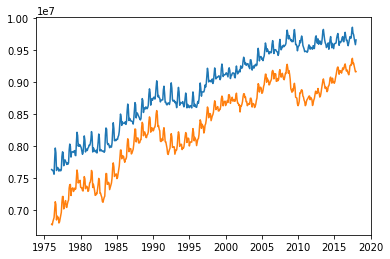

In [9]:
plt.plot(ny.date, ny['Labor Force'])
plt.plot(ny.date, ny['Employed'])

Text(0, 0.5, 'Number of People')

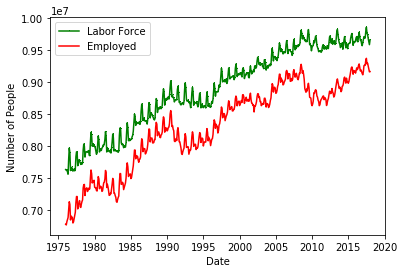

In [10]:
plt.plot(ny.date, ny['Labor Force'], color='g', marker=',', label='Labor Force')
plt.plot(ny.date, ny['Employed'], color='r', label='Employed')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Number of People')

Text(0, 0.5, 'Number of People')

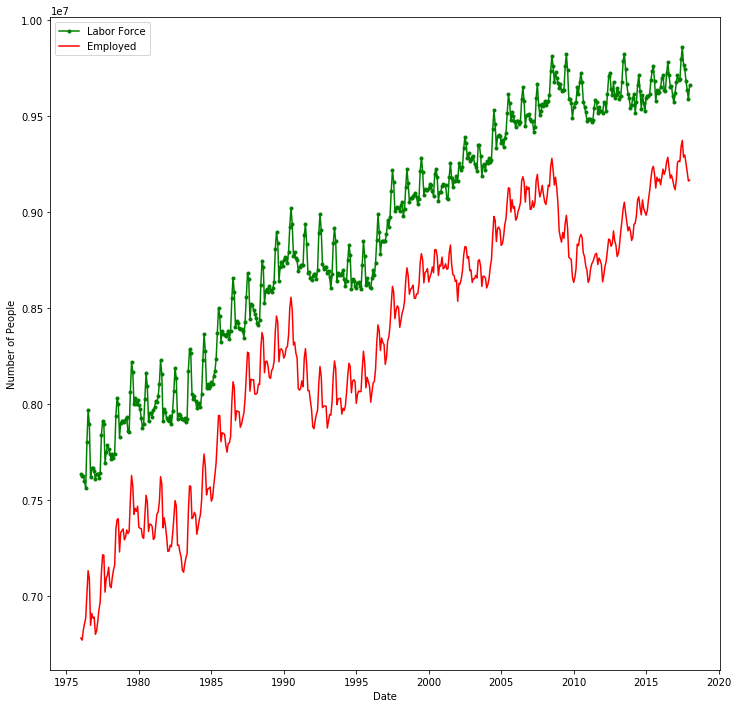

In [11]:
plt.figure(figsize=(12,12))
plt.plot(ny.date, ny['Labor Force'], 'g.-', label='Labor Force')
plt.plot(ny.date, ny['Employed'], color='r', label='Employed')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Number of People')

# Multiple Plots

In [12]:
data = pd.read_csv('Local_Area_Unemployment_Statistics__Beginning_1976.csv')

In [13]:
dates = data.apply(lambda x: pd.Timestamp('%d-%d-01' % (x.Year, x.Month)), axis=1)
d = pd.concat((data, pd.DataFrame({'date':dates})), axis=1)
d = d.sort_values(by='date')
d.head(2)

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,date
493,New York State,1976,1,7634700,6780200,854400,11.2%,1976-01-01
41569,BALANCE OF STATE,1976,1,4520500,4023100,497400,11.0%,1976-01-01


In [14]:
nyc = d[d['Area'] == 'New York City']
nys = d[d['Area'] == 'New York State']
buf = d[d['Area'] == 'Buffalo City']

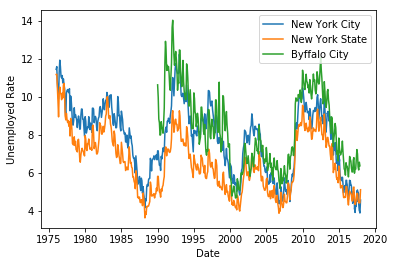

In [15]:
plt.plot(nyc.date, 100*nyc['Unemployed']/nyc['Labor Force'], label='New York City')
plt.plot(nys.date, 100*nys['Unemployed']/nys['Labor Force'], label='New York State')
plt.plot(buf.date, 100*buf['Unemployed']/buf['Labor Force'], label='Byffalo City')
plt.xlabel('Date')
plt.ylabel('Unemployed Rate')
plt.legend(loc='best')

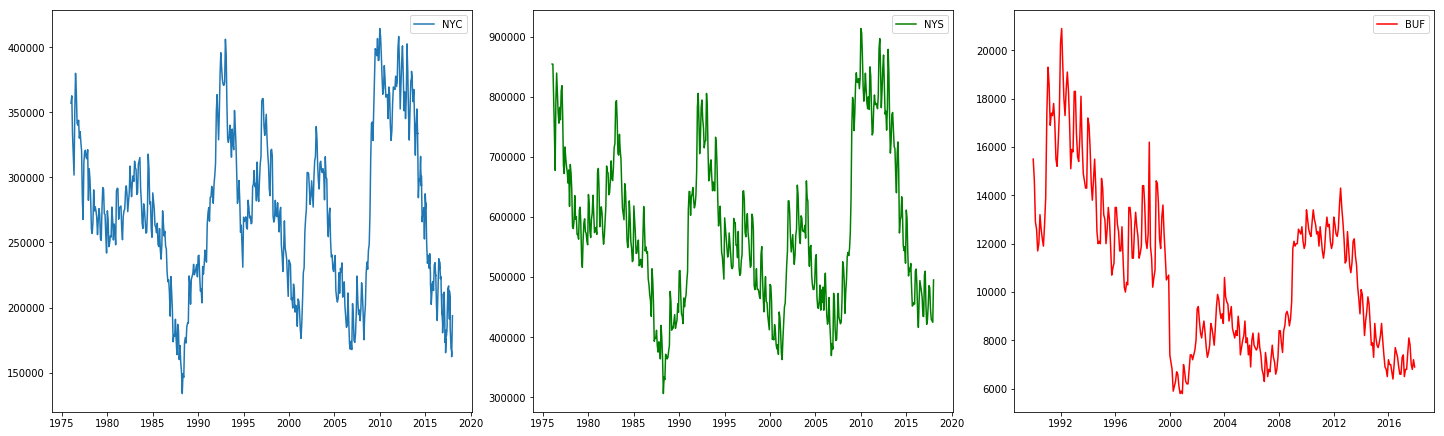

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(131)
plt.plot(nyc.date, nyc['Unemployed'], label='NYC')
plt.legend(loc='best')
plt.subplot(132)
plt.plot(nys.date, nys['Unemployed'], color='g', label='NYS')
plt.legend(loc='best')
plt.subplot(133)
plt.plot(buf.date, buf['Unemployed'], color='r', label='BUF')
plt.legend(loc='best')
plt.tight_layout(pad=0.5)

# Grid Plot

In [17]:
data = pd.read_csv('Local_Area_Unemployment_Statistics__Beginning_1976.csv')

In [18]:
dates = data.apply(lambda x: pd.Timestamp('%d-%d-01' % (x.Year, x.Month)), axis=1)
d = pd.concat((data, pd.DataFrame({'date':dates})), axis=1)
d = d.sort_values(by='date')
d.head(2)

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,date
493,New York State,1976,1,7634700,6780200,854400,11.2%,1976-01-01
41569,BALANCE OF STATE,1976,1,4520500,4023100,497400,11.0%,1976-01-01


In [19]:
nyc = d[d['Area'] == 'New York City']
nys = d[d['Area'] == 'New York State']
buf = d[d['Area'] == 'Buffalo City']

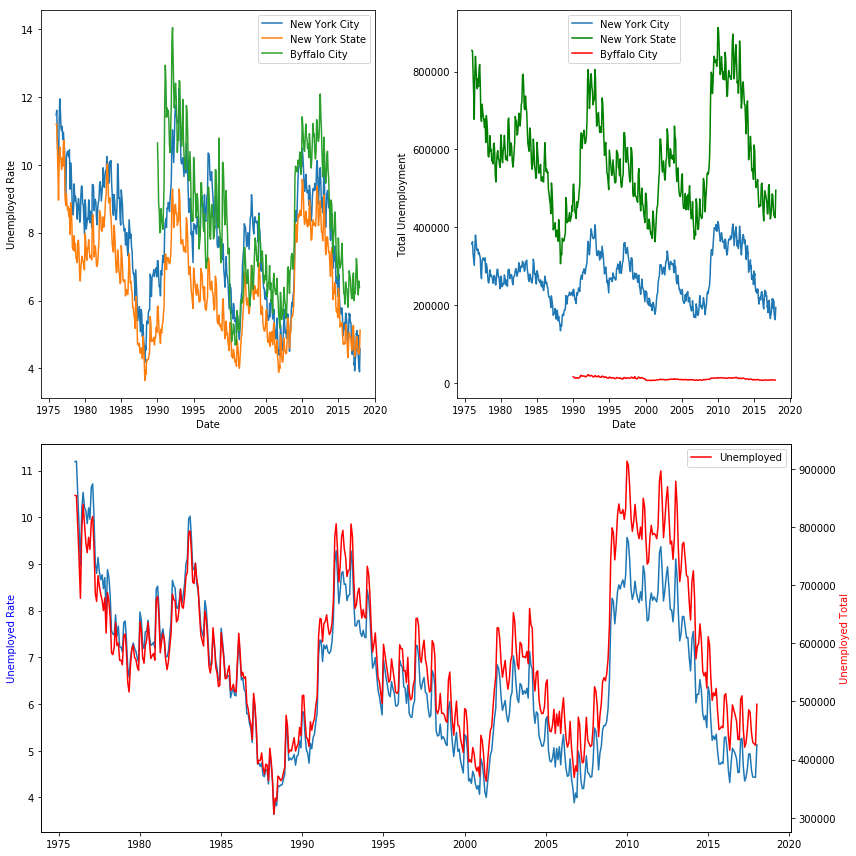

In [20]:
plt.figure(figsize=(12,12))
plt.subplot2grid((2, 2), (0, 0))
plt.plot(nyc.date, 100*nyc['Unemployed']/nyc['Labor Force'], label='New York City')
plt.plot(nys.date, 100*nys['Unemployed']/nys['Labor Force'], label='New York State')
plt.plot(buf.date, 100*buf['Unemployed']/buf['Labor Force'], label='Byffalo City')
plt.xlabel('Date')
plt.ylabel('Unemployed Rate')
plt.legend(loc='best')
plt.subplot2grid((2, 2), (0, 1))
plt.plot(nyc.date, nyc['Unemployed'], label='New York City')
plt.plot(nys.date, nys['Unemployed'], color='g', label='New York State')
plt.plot(buf.date, buf['Unemployed'], color='r', label='Byffalo City')
plt.xlabel('Date')
plt.ylabel('Total Unemployment')
plt.legend(loc='best')
plt.subplot2grid((2, 2), (1, 0), colspan=2)
plt.plot(nys.date, 100*nys['Unemployed']/nys['Labor Force'], label='New York State')
plt.ylabel('Unemployed Rate', color='b')
plt.twinx()
plt.plot(nys.date, nys['Unemployed'], 'r')
plt.xlabel('Date')
plt.ylabel('Unemployed Total', color='r')
plt.legend(loc='best')
plt.tight_layout()

# Bar Plots

In [21]:
movies = pd.read_csv('fandango_score_comparison.csv')
movies.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


In [22]:
scores = ['RT_norm', 'IMDB_norm', 'RT_user_norm']

Text(0, 0.5, 'SCORE')

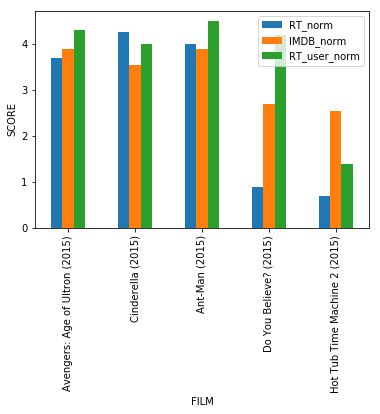

In [23]:
movies.head(5).plot.bar(x='FILM', y=scores)
plt.ylabel('SCORE')

Text(0.5, 0, 'SCORE')

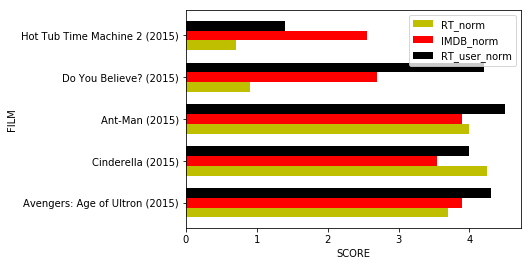

In [24]:
movies.head(5).plot.barh(x='FILM', y=scores, color=['y', 'r', 'k'], width=0.7)
plt.xlabel('SCORE')

Text(0.5, 0, 'SCORE')

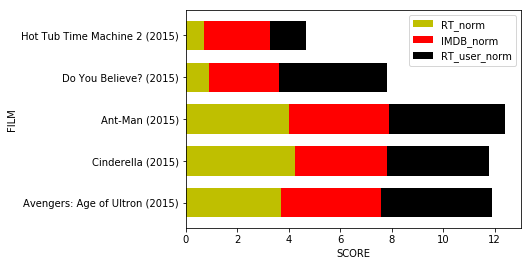

In [25]:
movies.head(5).plot.barh(x='FILM', y=scores, color=['y', 'r', 'k'], width=0.7, stacked=True)
plt.xlabel('SCORE')

# Scattered Plot

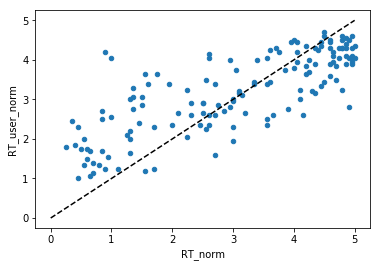

In [26]:
movies.plot.scatter(x='RT_norm', y='RT_user_norm')
plt.plot((0,5), (0,5), 'k--')

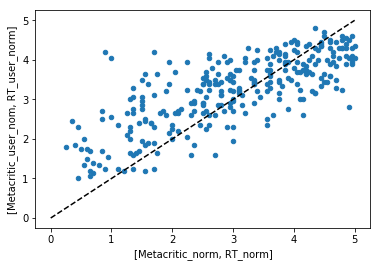

In [27]:
movies.plot.scatter(x=['Metacritic_norm', 'RT_norm'], y=['Metacritic_user_nom', 'RT_user_norm'])
plt.plot((0,5), (0,5), 'k--')

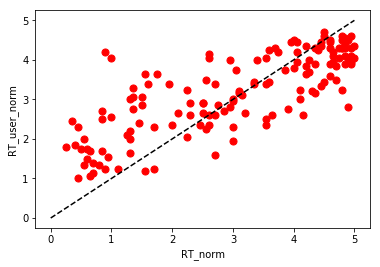

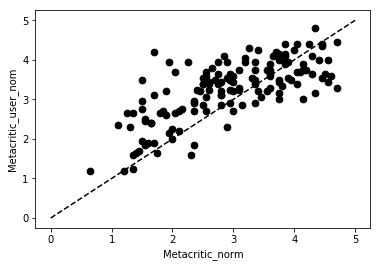

In [28]:
movies.plot.scatter(x='RT_norm', y='RT_user_norm',  c='r', marker='o', s=50)
plt.plot((0,5), (0,5), 'k--')
movies.plot.scatter(x='Metacritic_norm', y='Metacritic_user_nom', c='k', s=45)
plt.plot((0,5), (0,5), 'k--')

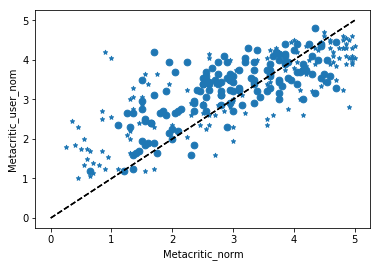

In [29]:
movies.plot.scatter(x='RT_norm', y='RT_user_norm',  marker='*')
plt.plot((0,5), (0,5), 'k--')
movies.plot.scatter(x='Metacritic_norm', y='Metacritic_user_nom', s=45, ax=plt.gca())
plt.plot((0,5), (0,5), 'k--')

# Histograms

Text(0.5, 0, 'Score')

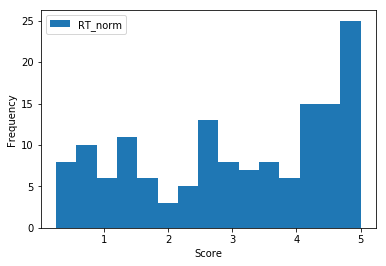

In [30]:
movies.plot.hist(y='RT_norm', bins=15)
plt.xlabel('Score')

Text(0.5, 0, 'Score')

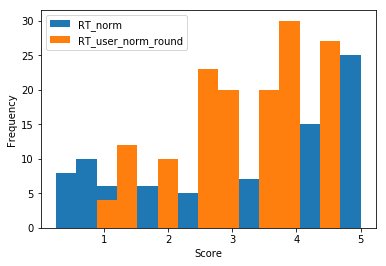

In [31]:
movies.plot.hist(y=['RT_norm', 'RT_user_norm_round'], bins=15)
plt.xlabel('Score')

Text(0.5, 0, 'Score')

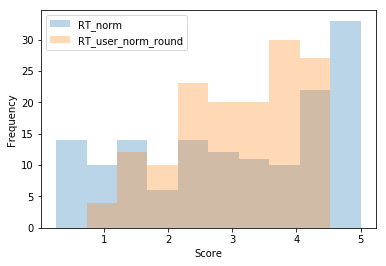

In [32]:
movies.plot.hist(y=['RT_norm', 'RT_user_norm_round'], alpha=0.3)
plt.xlabel('Score')

Text(0.5, 0, 'Score')

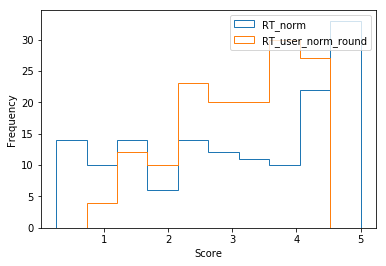

In [33]:
movies.plot.hist(y=['RT_norm', 'RT_user_norm_round'], histtype='step')
plt.xlabel('Score')

# Box Plot

In [34]:
scores = ['RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm']

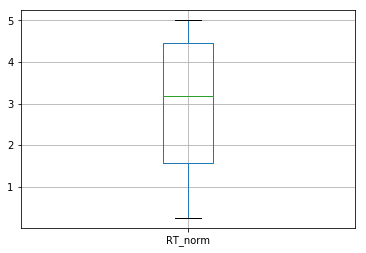

In [35]:
movies.boxplot(column='RT_norm')

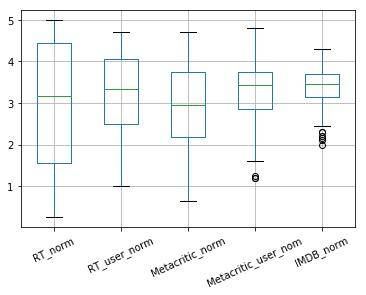

In [36]:
movies.boxplot(column=scores, rot=25)

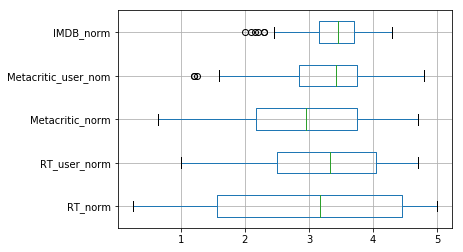

In [37]:
movies.boxplot(column=scores, vert=False)

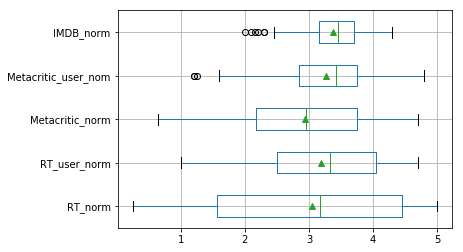

In [38]:
movies.boxplot(column=scores, showmeans=True, vert=False)

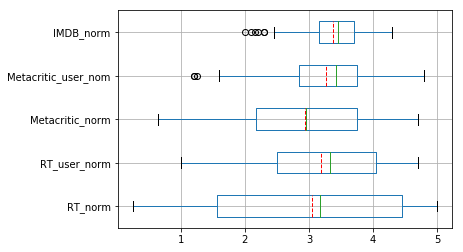

In [39]:
movies.boxplot(column=scores, showmeans=True, meanline=True, vert=False, meanprops={'color': 'r'})

# Improving Plot Aesthetics

In [40]:
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [41]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)
z = np.random.normal(size=1000)
im = gaussian_filter(np.random.normal(size=(512, 512)), 16)

In [42]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

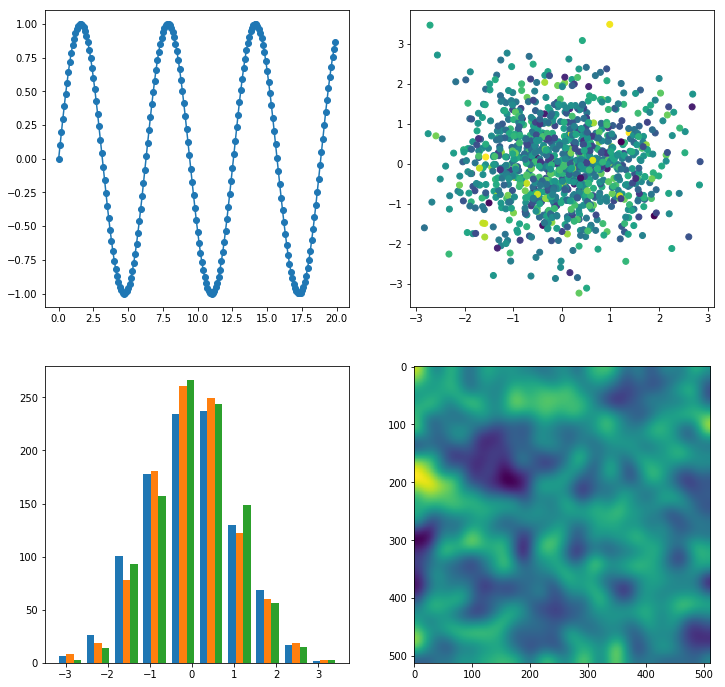

In [43]:
plt.figure(figsize=(12,12))
plt.tight_layout()
plt.subplot(221)
plt.plot(np.arange(0, 20, 0.1), np.sin(np.arange(0, 20, 0.1)), 'o-')
plt.subplot(222)
plt.scatter(x, y, c=z)
plt.subplot(223)
plt.hist((x, y, z))
plt.subplot(224)
plt.imshow(im)


Text(0, 0.5, '$x^2$')

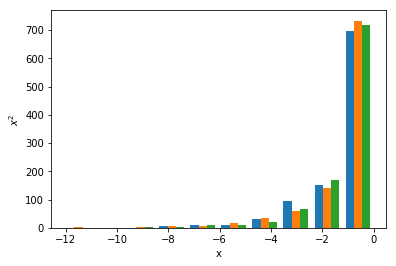

In [44]:
plt.hist((-x**2, -y**2, -z**2))
plt.xlabel('x')
plt.ylabel(r'$x^2$')

Text(0, 0.5, '$x^2$')

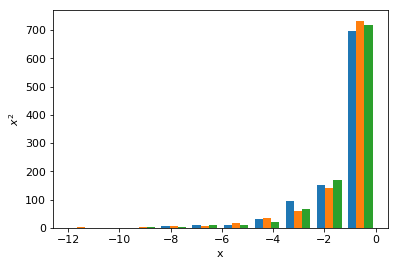

In [45]:
#Changing Font
plt.rcParams['font.size'] = 11
plt.hist((-x**2, -y**2, -z**2))
plt.xlabel('x')
plt.ylabel(r'$x^2$')

Text(0, 0.5, '$x^2$')

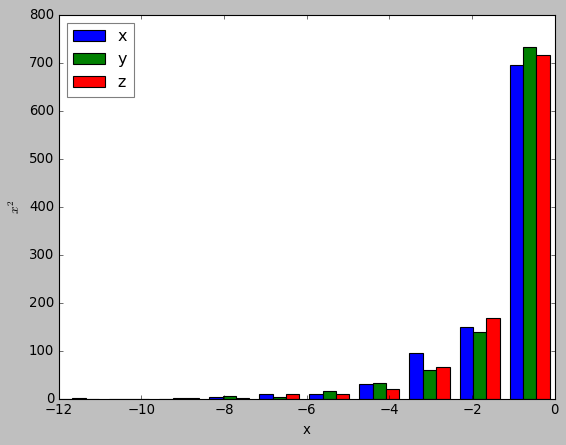

In [46]:
#Working with legend
plt.style.use(['classic'])
plt.hist((-x**2, -y**2, -z**2), label=('x', 'y', 'z'))
plt.legend(loc='upper right')
plt.legend(loc='best', framealpha=0.5)
plt.xlabel('x')
plt.ylabel(r'$x^2$')

# Color for Better Clarity

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [48]:
data = pd.read_csv('fandango_score_comparison.csv')

(0, 100)

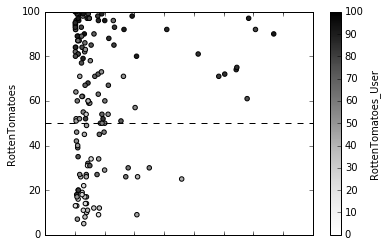

In [49]:
data.plot.scatter(y='RottenTomatoes', x='IMDB_user_vote_count', c='RottenTomatoes_User', vmin=0, vmax=100, edgecolor=None, rot=25)
plt.axhline(50, color='k', linestyle='--')
plt.ylim(0, 100)

(0, 100)

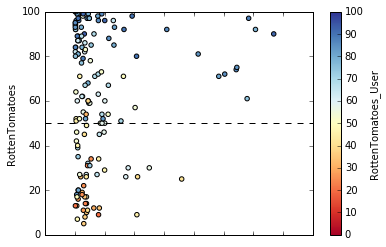

In [50]:
data.plot.scatter(y='RottenTomatoes', x='IMDB_user_vote_count', c='RottenTomatoes_User', vmin=0, vmax=100, edgecolor=None, rot=25, cmap='RdYlBu')
plt.axhline(50, color='k', linestyle='--')
plt.ylim(0, 100)

(0, 100)

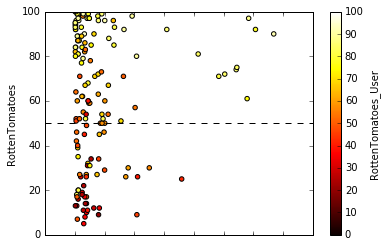

In [51]:
data.plot.scatter(y='RottenTomatoes', x='IMDB_user_vote_count', c='RottenTomatoes_User', vmin=0, vmax=100, edgecolor=None, rot=25, cmap='hot')
plt.axhline(50, color='k', linestyle='--')
plt.ylim(0, 100)

(0, 100)

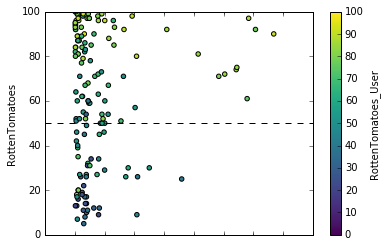

In [52]:
data.plot.scatter(y='RottenTomatoes', x='IMDB_user_vote_count', c='RottenTomatoes_User', vmin=0, vmax=100, edgecolor=None, rot=25, cmap='viridis')
plt.axhline(50, color='k', linestyle='--')
plt.ylim(0, 100)

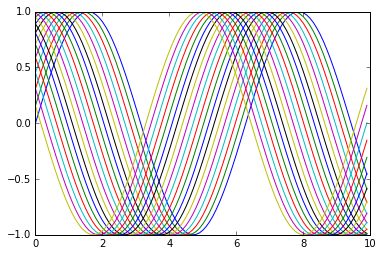

In [53]:
# Selecting color from colormap
for i in range(20):
    plt.plot(np.arange(0,10,0.1), np.sin(i*np.pi/20+np.arange(0,10,0.1)))

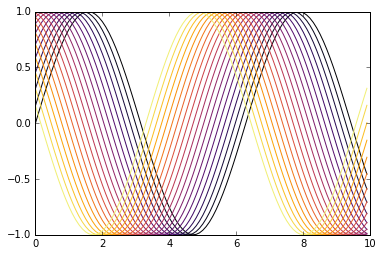

In [54]:
cm = plt.cm.get_cmap('inferno')
for i in range(20):
    plt.plot(np.arange(0,10,0.1), np.sin(i*np.pi/20+np.arange(0,10,0.1)), color=cm(i/20))

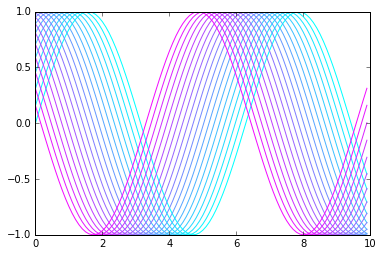

In [55]:
cm = plt.cm.get_cmap('cool')
for i in range(20):
    plt.plot(np.arange(0,10,0.1), np.sin(i*np.pi/20+np.arange(0,10,0.1)), color=cm(i/20))

# Layouts and Annotations

In [56]:
data = pd.read_csv('fandango_score_comparison.csv')

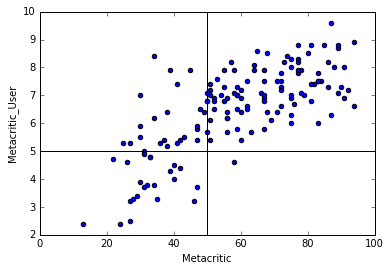

In [57]:
data.plot.scatter(x='Metacritic', y='Metacritic_User')
plt.axhline(5, color='k')
plt.axvline(50, color='k')

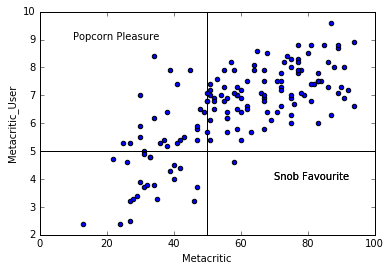

In [58]:
data.plot.scatter(x='Metacritic', y='Metacritic_User')
plt.text(10, 9, 'Popcorn Pleasure')
plt.text(70, 4, 'Snob Favourite')
plt.text(70, 4, 'Snob Favourite')
plt.axhline(5, color='k')
plt.axvline(50, color='k')

In [59]:
data[data['Metacritic'] == data['Metacritic'].min()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
133,Paul Blart: Mall Cop 2 (2015),5,36,13,2.4,4.3,3.5,3.5,0.25,1.8,...,2.15,0.5,2.0,0.5,1.0,2.0,211,15004,3054,0.0


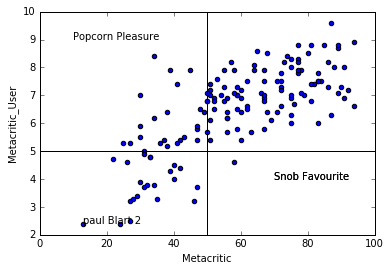

In [60]:
data.plot.scatter(x='Metacritic', y='Metacritic_User')
plt.annotate('paul Blart 2', xy=(13, 2.4) )
plt.text(10, 9, 'Popcorn Pleasure')
plt.text(70, 4, 'Snob Favourite')
plt.text(70, 4, 'Snob Favourite')
plt.axhline(5, color='k')
plt.axvline(50, color='k')

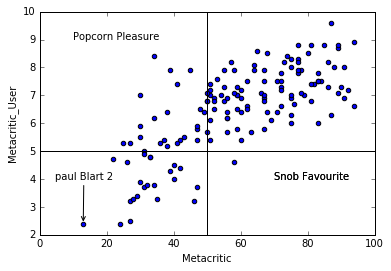

In [61]:
data.plot.scatter(x='Metacritic', y='Metacritic_User')
plt.annotate('paul Blart 2', xy=(13, 2.4), xytext=(4.5,4), arrowprops=dict(facecolor='r', arrowstyle='->'))
plt.text(10, 9, 'Popcorn Pleasure')
plt.text(70, 4, 'Snob Favourite')
plt.text(70, 4, 'Snob Favourite')
plt.axhline(5, color='k')
plt.axvline(50, color='k')

# Using the Seaborn Package


In [62]:
import seaborn as sns

In [63]:
data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


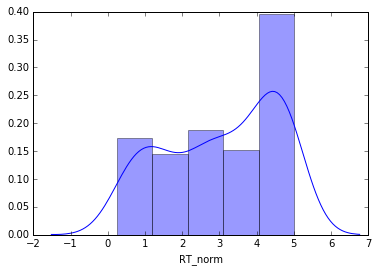

In [64]:
# Distribution plot
sns.distplot(data['RT_norm'])

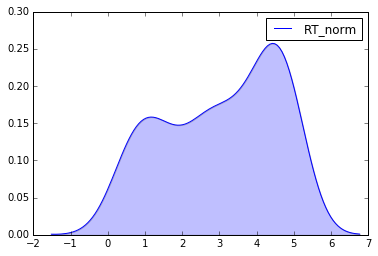

In [65]:
# KDE Plot
sns.kdeplot(data['RT_norm'], shade=True)

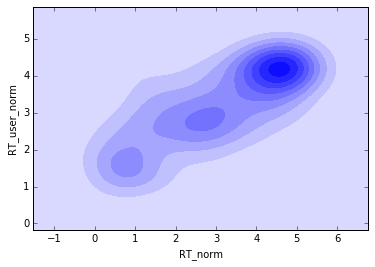

In [66]:
# 2D KDE PLot
sns.kdeplot(data['RT_norm'], data['RT_user_norm'], shade=True)

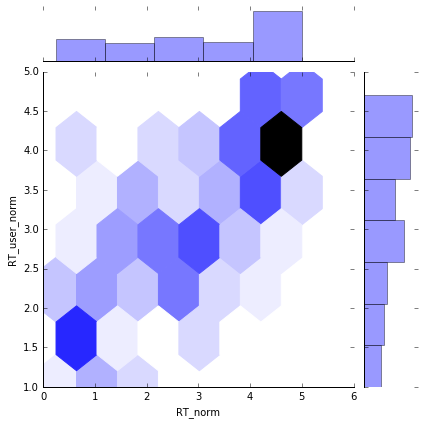

In [67]:
# joint plot
sns.jointplot(x='RT_norm', y='RT_user_norm', data=data, kind='hex')

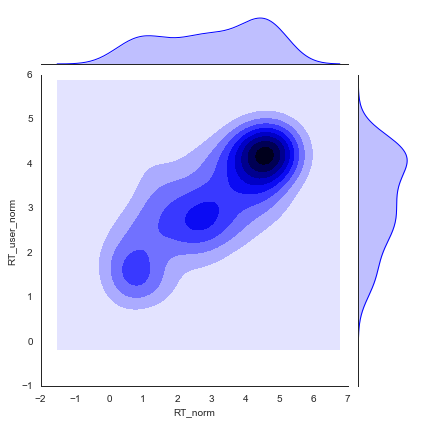

In [68]:
# Theming seaborn
sns.set_style('white')
sns.jointplot(x='RT_norm', y='RT_user_norm', data=data, kind='kde')

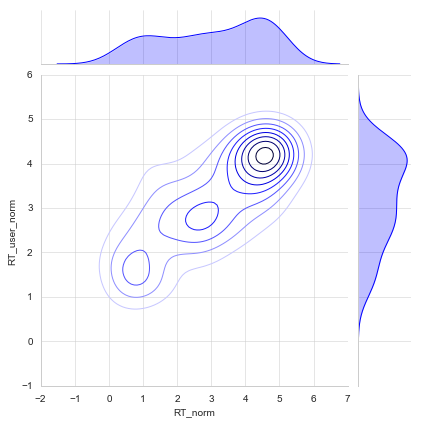

In [69]:
sns.set_style('whitegrid')
sns.jointplot(x='RT_norm', y='RT_user_norm', data=data, kind='kde', shade=False)

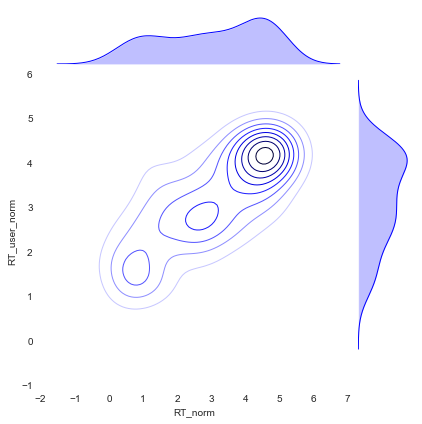

In [70]:
# Spine control
sns.set_style('white')
sns.jointplot(x='RT_norm', y='RT_user_norm', data=data, kind='kde', shade=False)
sns.despine(left=True, bottom=True)

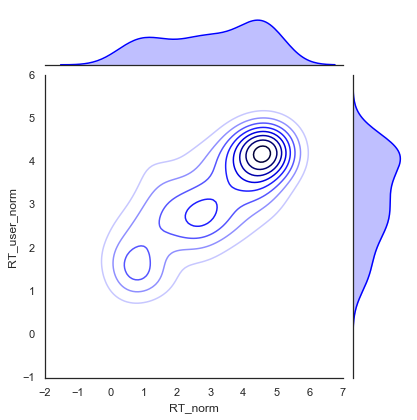

In [71]:
# Automatic scaling
sns.set_style('white')
sns.set_context('notebook')
sns.jointplot(x='RT_norm', y='RT_user_norm', data=data, kind='kde', shade=False)

# Regressions and Statistics with Seaborn


In [72]:
drink = pd.read_csv('drinks.csv')

In [73]:
drinks = drink.pivot_table(index='country')
drinks.head()

,beer_servings,spirit_servings,total_litres_of_pure_alcohol,wine_servings
country,,,,
Afghanistan,0,0,0.0,0
Albania,89,132,4.9,54
Algeria,25,0,0.7,14
Andorra,245,138,12.4,312
Angola,217,57,5.9,45


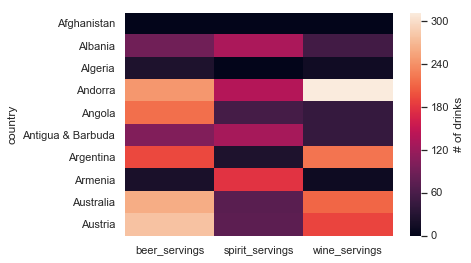

In [74]:
sns.heatmap(drinks.drop('total_litres_of_pure_alcohol', axis=1).head(10), cbar_kws=dict(label='# of drinks'))

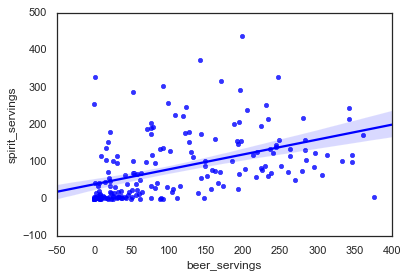

In [75]:
# Linear Regretion 
sns.regplot(x='beer_servings', y='spirit_servings', data=drinks)

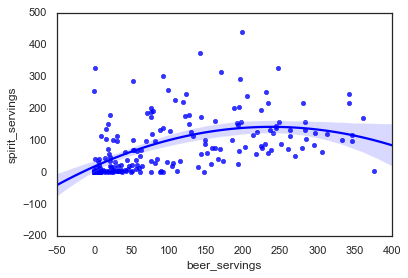

In [76]:
# Polynomial regression
sns.regplot(x='beer_servings', y='spirit_servings', data=drinks, order=2)

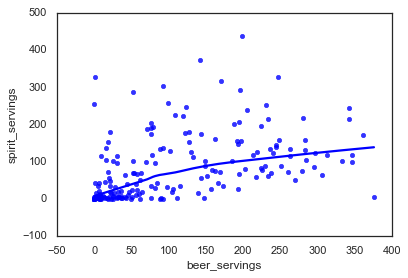

In [77]:
# Lowess (Locally weighted linear regression) (require statsmodel!)
sns.regplot(x='beer_servings', y='spirit_servings', data=drinks, lowess=True)

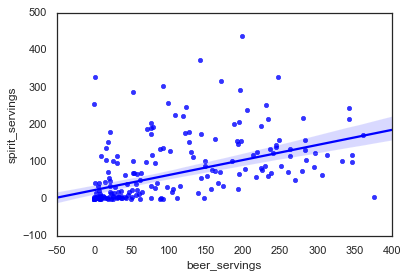

In [78]:
# Robust regression 
sns.regplot(x='beer_servings', y='spirit_servings', data=drinks, robust=True)

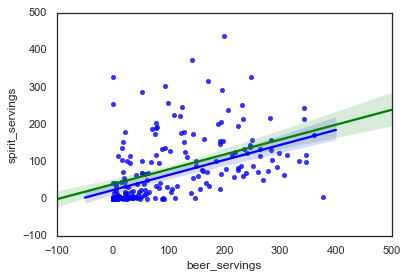

In [79]:
sns.regplot(x='beer_servings', y='spirit_servings', data=drinks, robust=True)
sns.regplot(x='beer_servings', y='spirit_servings', data=drinks, scatter=False, robust=False)

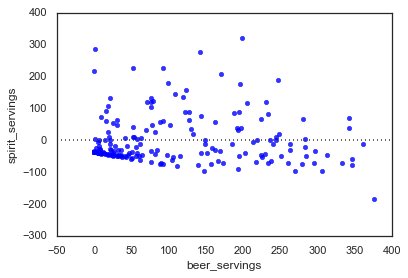

In [80]:
# Plot residuals
sns.residplot(x='beer_servings', y='spirit_servings', data=drinks)


# Comparisons with Conditional Plots


In [81]:
drink = pd.read_csv('drinks.csv')

In [82]:
booze = drink[['beer_servings', 'spirit_servings', 'wine_servings']]

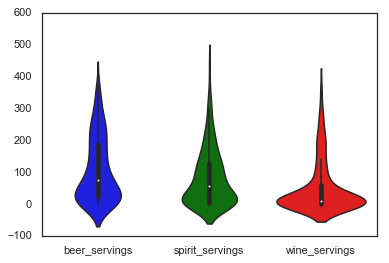

In [83]:
sns.violinplot(data=booze)

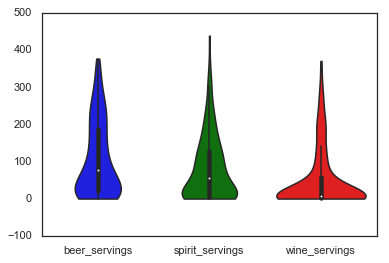

In [84]:
#Limit data range
sns.violinplot(data=booze, cut=0)

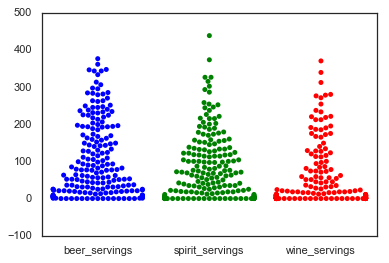

In [85]:
# swarm plot
sns.swarmplot(data=booze)

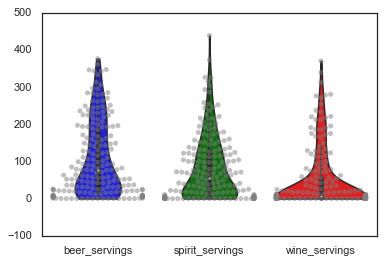

In [86]:
# combine
sns.violinplot(data=booze, cut=0)
sns.swarmplot(data=booze, color='gray', alpha=0.5)

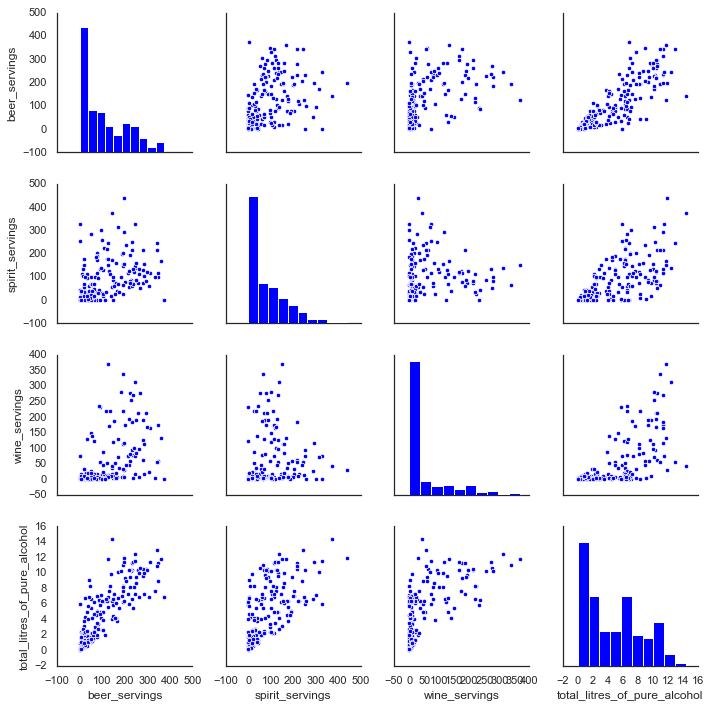

In [87]:
# compare all relation with pairplot
sns.pairplot(drink)

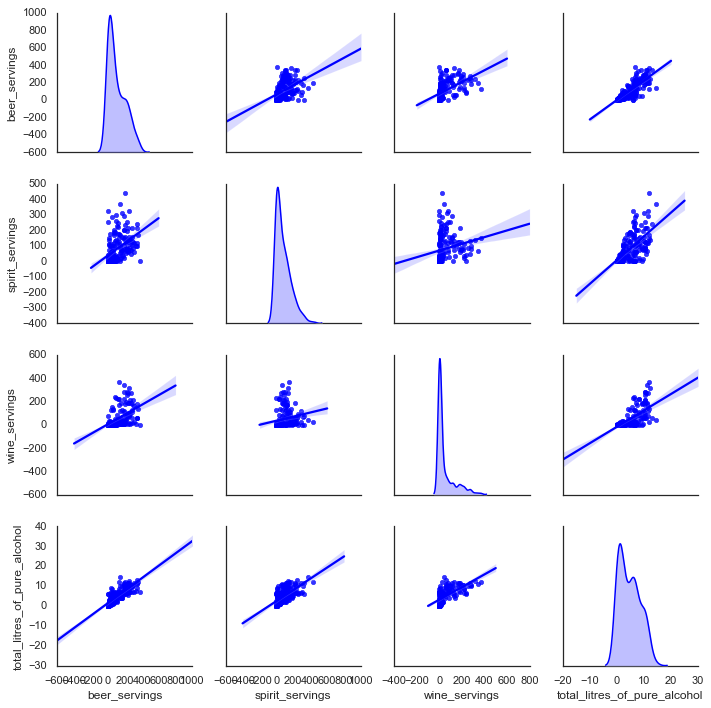

In [88]:
# change plot type
sns.pairplot(drink, diag_kind='kde', kind='reg')